<a href="https://colab.research.google.com/github/juhee3199/kakaotalk_analysis_proj/blob/main/warming_up/kakao_proj_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# konlpy Mecab 설치
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 1.6MB/s 
     |████████████████████████████████| 460kB 31.9MB/s 
     |████████████████████████████████| 92kB 9.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 74 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,077 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

# Pandas 처리

In [11]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
def dateformat(y=0,m=0,d=0,h=0,mm=0,s=0):
    return "%d-%02d-%02d %02d:%02d:%02d"%(y,m,d,h,mm,s)

In [ ]:
# txt인 경우 (iphone)

f = open('Talk_2021.5.13 19_07-1.txt', mode='r', encoding='utf-8')

file_name = f.readline()
save_date_re = re.compile('저장한 날짜 : ([0-9]{4})\. ([0-9]{1,2})\. ([0-9]{1,2})\. (오전|오후) ([0-9]{1,2}):([0-9]{2})')
m = save_date_re.match(f.readline())
if m[4]=='오후':
  save_date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5])+12, int(m[6]))

else: 
  save_date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5]), int(m[6]))

f.readline() # 공백 제거
f.readline() # 공백 제거
f.readline() # 공백 제거

history = []
histline = ''
date = None

date_re = re.compile('([0-9]{4})년 ([0-9]{1,2})월 ([0-9]{1,2})일 ((월|화|수|목|금|토|일)요일)')
invite_re = re.compile('([0-9]{4})\. ([0-9]{1,2})\. ([0-9]{1,2})\. (오전|오후) ([0-9]{1,2}):([0-9]{2}): ((.+)님이 .+ 초대했습니다.)') 
exit_re = re.compile('([0-9]{4})\. ([0-9]{1,2})\. ([0-9]{1,2})\. (오전|오후) ([0-9]{1,2}):([0-9]{2}): ((.+)님이 나갔습니다.)')
chat_re = re.compile('([0-9]{4})\. ([0-9]{1,2})\. ([0-9]{1,2})\. (오전|오후) ([0-9]{1,2}):([0-9]{2}), (.+) : (.+)')

chat_temp = ''

i=0
while True:
    line = f.readline()
    if not line: 
        break
    # print(line, end='')

    # chat
    m = chat_re.match(line)
    if m:
        if m[4]=='오후':
          date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5])+12, int(m[6]))
        else: 
          date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5]), int(m[6]))
        user = m[7]
        content = m[8]
        history.append([date, user, content])
        continue
    # date
    m = date_re.match(line)
    if m:
        date = dateformat(int(m[1]), int(m[2]), int(m[3]))
        continue
    # invite
    m = invite_re.match(line)
    if m:
        #date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5]), int(m[6]))
        if m[4]=='오후':
          date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5])+12, int(m[6]))
        else: 
          date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5]), int(m[6]))
        user = m[8]
        content = m[7]
        history.append([date, user, content])
        continue
    # exit
    m = exit_re.match(line)
    if m:
        #date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5]), int(m[6]))
        if m[4]=='오후':
          date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5])+12, int(m[6]))
        else: 
          date = dateformat(int(m[1]), int(m[2]), int(m[3]), int(m[5]), int(m[6]))
        user = m[7]
        content = m[8]
        history.append([date, user, content])
        continue
    # \n chat
    history[-1][2] += line
df = pd.DataFrame(history, columns=['Date', 'User', 'Message'])

In [ ]:
df

,Date,User,Message
0,2020-08-01 21:13:00,이장후,"이장후님이 최우혁님, 나영채님과 이주희님을 초대했습니다."
1,2020-08-01 21:13:00,이장후,안녕하세요!
2,2020-08-01 21:13:00,나영채,이모티콘
3,2020-08-01 21:16:00,이장후,- SAI 캘린더 연동하기- SAI 회의록 notion 초대\n- SAI 회의록 구...
4,2020-08-01 21:21:00,이장후,Notion google mail 로 초대했습니담
...,...,...,...
4973,2021-05-13 18:06:00,나영채,데이터로 바꾸는 코드를 올려놓은건데
4974,2021-05-13 18:06:00,이주희,아아ㅏ 글쿵..
4975,2021-05-13 18:07:00,이주희,그럼 각자 데이터 변환해서 실습해봐야하는거지??
4976,2021-05-13 18:50:00,나영채,녜


In [ ]:
import pandas as pd
df.to_csv('kakaotalk_2021_staff_4.csv')


# analysis

In [8]:
import pandas as pd

df = pd.read_csv('kakaotalk_2021_staff_4.csv', usecols=range(1,4))
df

,Date,User,Message
0,2020-08-01 21:13:00,이장후,"이장후님이 최우혁님, 나영채님과 이주희님을 초대했습니다."
1,2020-08-01 21:13:00,이장후,안녕하세요!
2,2020-08-01 21:13:00,나영채,이모티콘
3,2020-08-01 21:16:00,이장후,- SAI 캘린더 연동하기- SAI 회의록 notion 초대\n- SAI 회의록 구...
4,2020-08-01 21:21:00,이장후,Notion google mail 로 초대했습니담
...,...,...,...
4973,2021-05-13 18:06:00,나영채,데이터로 바꾸는 코드를 올려놓은건데
4974,2021-05-13 18:06:00,이주희,아아ㅏ 글쿵..
4975,2021-05-13 18:07:00,이주희,그럼 각자 데이터 변환해서 실습해봐야하는거지??
4976,2021-05-13 18:50:00,나영채,녜


In [4]:
"""#print(df['Message'].values)#.split()

df['M_split'] =0

j=0
for i in df['Message'].values:
  df['M_split'][j] = i.split()
  j+=1

df['M_split']"""

"#print(df['Message'].values)#.split()\n\ndf['M_split'] =0\n\nj=0\nfor i in df['Message'].values:\n  df['M_split'][j] = i.split()\n  j+=1\n\ndf['M_split']"

### khaiii 카카오 형태소 분석기 사용

In [5]:
!git clone https://github.com/kakao/khaiii.git

!pip install cmake

!mkdir build

!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

Cloning into 'khaiii'...
remote: Enumerating objects: 1009, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 1009 (delta 41), reused 69 (delta 24), pack-reused 877
Receiving objects: 100% (1009/1009), 33.06 MiB | 28.69 MiB/s, done.
Resolving deltas: 100% (399/399), done.
-- [hunter] Initializing Hunter workspace (70287b1ffa810ee4e952052a9adff9b4856d0d54)
-- [hunter]   https://github.com/ruslo/hunter/archive/v0.23.34.tar.gz
-- [hunter]   -> /root/.hunter/_Base/Download/Hunter/0.23.34/70287b1
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -

In [9]:
 # 필요한 형태 및 단어로 변형해서 반환
 
 def return_need_word(morph):

   # 조사, 어미, 접미사, 접두사, 감탄사, 특수기호, 숫자 제거
   # 체언 접두사와 어근은 제거하지 않음
  not_use = ['NNB','VX','JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JX','JC','IC',
          'EP','EF','EC','ETN','ETM','XSN','XSV','XSA',
          'SF','SP','SS','SE','SO','SW','SWK','SN']

  stopwords = ['에','을','를','이', '은','는', '가','도','와','아','다','라' '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '주', 
               '해','만','면','워','등', '같', '때', '년', '한', '지', '대하', '오', '말', '일', '그렇', '위하']      

  if (morph.tag in not_use) or (morph.lex in stopwords):
      return '' 
  # 동사에 '다'
  elif morph.tag == 'VA' or morph.tag == 'VV':
      return morph.lex + '다'
  else:
      word = morph.lex
      word = re.sub('[a-zA-Z]', '', word)
      word = re.sub('[\n+]', '', word)
      return word

In [12]:
# 형태소 분석 및 전처리

from khaiii import KhaiiiApi

def khaiii_text_preprocessing(text_list):
    tokenizer = KhaiiiApi() #형태소 분석기

    token_list = [] 
    
    for text in text_list:
        morph_list = []
        for word in tokenizer.analyze(text):  # 형태소 분석
            for morph in word.morphs:
              morph_lex = return_need_word(morph) #
              if morph_lex != '':
                morph_list.append(morph_lex)
          
        token_list.append(morph_list)
        
    return token_list, tokenizer

df['khaiii'], khaiii = khaiii_text_preprocessing(df['Message'])
df['khaiii']

0                   [장후, 최, 우혁, 영채, 이주, 희, 초대]
1                                         [안녕]
2                                       [이모티콘]
3       [캘린더, 연동, 회의록, 초대, 회의록, 구글독스, 내용, 옮기다]
4                                      [초대, 담]
                         ...                  
4973                      [데이터, 바꾸다, 코드, 올려놓다]
4974                                 [ㅏ, 글, 쿵]
4975                     [그럼, 각자, 데이터, 변환, 실습]
4976                                        []
4977                                       [옙]
Name: khaiii, Length: 4978, dtype: object

#####  tag 확인하고, 필요없는 형태소 파악

In [ ]:
# 형태소 분석 및 전처리

from khaiii import KhaiiiApi

def khaiii_tag(text_list):
    tokenizer = KhaiiiApi() #형태소 분석기

    token_list = [] 
    
    for text in text_list:
       
        morph_list = []
        for word in tokenizer.analyze(text):  # 형태소 분석
            for morph in word.morphs:
              morph_lex = return_need_word(morph) #
              if morph_lex != '':
                morph_list.append((morph_lex, morph.tag))
          
        token_list.append(morph_list)
        
    return token_list, tokenizer

df['khaiii_tag'], khaiii = khaiii_tag(df['Message'])
#df['khaiii_tag']

In [ ]:
df['khaiii_tag']

##### 많이 사용하는 단어

In [13]:
from khaiii import KhaiiiApi

def khaiii_text_preprocessing(text_list):
    tokenizer = KhaiiiApi() #형태소 분석기

    token_list = [] 
    word_name = []
    word_cnt=[]

    for text in text_list:
       
        morph_list = []
        for word in tokenizer.analyze(text):  # 형태소 분석
            for morph in word.morphs:
              morph_lex = return_need_word(morph) #
              if morph_lex != '':
                morph_list.append(morph_lex)
          
        token_list.append(morph_list)
        

        # bow
        word2index={}  
        bow=[]  
        for voca in morph_list:  
                #if voca in stopwords:
                #  continue
                #elif voca not in word2index.keys():  
                if voca not in word2index.keys():  
                    word2index[voca]=len(word2index)  
        # token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
                    bow.insert(len(word2index)-1,1)
        # BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
                else:
                    index=word2index.get(voca)
        # 재등장하는 단어의 인덱스를 받아옵니다.
                    bow[index]=bow[index]+1
        # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  

        word_name.append(list(word2index.keys()))
        word_cnt.append(bow)

       
    return token_list, tokenizer, word_name, word_cnt

df['khaiii_content'], khaiii, khaiii_word_name, khaiii_word_cnt = khaiii_text_preprocessing(df['Message'])

In [ ]:
#khaiii_word_name

In [14]:
khaiii_word_name = np.concatenate(khaiii_word_name).tolist()
khaiii_word_name

khaiii_word_cnt = np.concatenate(khaiii_word_cnt).tolist()
# word_cnt

khaiii_word_df = pd.DataFrame({
            'khaiii_word_name': khaiii_word_name,
           'khaiii_word_cnt': khaiii_word_cnt})
khaiii_word_df

,khaiii_word_name,khaiii_word_cnt
0,장후,1.0
1,최,1.0
2,우혁,1.0
3,영채,1.0
4,이주,1.0
...,...,...
15319,각자,1.0
15320,데이터,1.0
15321,변환,1.0
15322,실습,1.0


In [15]:
khaiii_word_df = khaiii_word_df.groupby(khaiii_word_df.khaiii_word_name).sum()
khaiii_sort= khaiii_word_df.sort_values(by="khaiii_word_cnt", ascending=False)#.groupby("grp").head(3)

khaiii_sort.head(60)

,khaiii_word_cnt
khaiii_word_name,
있다,289.0
팀,272.0
이모티콘,251.0
사진,232.0
ㅋㅋ,192.0
좋다,147.0
안,140.0
ㅠ,137.0
사람,114.0


### Mecab

In [ ]:
# 형태소 분석 및 전처리
def Mecab_text_preprocessing(text_list):
    tokenizer = Mecab() #형태소 분석기

    token_list = [] 
    
    for text in text_list:
        token = tokenizer.morphs(text) #형태소 분석

        token = [t for t in token] 
        token_list.append(token)
        
    return token_list, tokenizer

df['content'], mecab = Mecab_text_preprocessing(df['Message'])

In [ ]:
df['content']

0       [이, 장후, 님, 이, 최우혁, 님, ,, 나영채, 님, 과, 이주희, 님, 을,...
1                                                    [사진]
2       [저희, 일정, 관련, 해서, 우선, 괜찮, 나, 실험, 해, 볼, 수, 있, 는,...
3       [구글, 컴퓨터, 에서, 아마, 메일, 받, 으면, 캘린더, 구독, 할, 수, 있,...
4              [ㅋㅋㅋ, 별로, 받, 고, 싶, 지, 않, 은, 일정, 이, 긴, 할텐데]
                              ...                        
1751                                                [아닌가]
1752                         [저게, 아마, figure, 1, 이, 지, ?]
1753                         [Fig, 1, 어쩌, 고, 하, 기, 전, 까지]
1754                     [그냥, 없, 는, 그림, 이, 라고, 생각, 해도, 돼]
1755    [아, 그냥, 내, 가, 번역, 을, 좀, 잘못, 생각, 한, 듯, ㅋㅋ, ㅈ, ㅅ...
Name: content, Length: 1756, dtype: object

### okt(twitter) 사용

--> okt가 조금 더 나은것 같아서 사용함

In [74]:
user_name = df.User.unique()[:4]
user_name

array(['이장후', '나영채', '최우혁', '이주희'], dtype=object)

In [ ]:
 # 필요한 형태 및 단어로 변형해서 반환
 
 def return_need_word(morph):

   # 조사, 어미, 접미사, 접두사, 감탄사, 특수기호, 숫자 제거
   # 체언 접두사와 어근은 제거하지 않음
  not_use = ['NNB','JKS','JKC','JKG','JKO','JKB','JKV','JKQ','JX','JC','IC',
          'EP','EF','EC','ETN','ETM','XSN','XSV','XSA',
          'SF','SP','SS','SE','SO','SW','SWK','SN']

  stopwords = ['에','을','를','이', '은','는', '가','도','와','아','다','라' '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '주', 
               '해','만','면','워','등', '같', '때', '년', '한', '지', '대하', '오', '말', '일', '그렇', '위하']      

  if (morph.tag in not_use) or (morph.lex in stopwords):
      return '' 
  # 동사에 '다'
  elif morph.tag == 'VA' or morph.tag == 'VV':
      return morph.lex + '다'
  else:
      word = morph.lex
      word = re.sub('[a-zA-Z]', '', word)
      word = re.sub('[\n+]', '', word)
      word = re.sub('[https]', '', word)
      return word

In [129]:
from konlpy.tag import Okt  

def okt_text_preprocessing(text_list):
    tokenizer=Okt()  

    stopwords = ['에','을','를','이', '은','는', '가','도','와','아','다','라' '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '주', 
               '해','만','면','워','등', '같', '때', '년', '한', '지', '대하', '오', '말', '일', '그렇', '위하',
               '저','의','명', '로','고','과','게']  
  
    token_list = [] 
    word_name = []
    word_cnt=[]
    
    for text in text_list:
     #   text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
     #   text = re.sub('[\n+]', '', text)
     #   text = re.sub(r"[0-9]+", ' ', text) 
       # text = re.sub('[을-를-이-가-걸-아]', '', text)

        text = re.sub('[ㅋ.+]', '', text)
        hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 영어도 제외. url이 너무 많이 들어가 있어서
        text = hangul.sub('', text)
        token = tokenizer.morphs(text) #형태소 분석

        token = [t for t in token] 
        token_list.append(token)

        # bow
        word2index={}  
        bow=[]  
        for voca in token:  
                if voca in stopwords:
                  continue
                elif voca not in word2index.keys() or voca=='':  
                #if voca not in word2index.keys():  
                    word2index[voca]=len(word2index)  
        # token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
                    bow.insert(len(word2index)-1,1)
        # BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
                else:
                    index=word2index.get(voca)
        # 재등장하는 단어의 인덱스를 받아옵니다.
                    bow[index]=bow[index]+1
        # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
        #print(word2index)

        #word_name = word2index

        word_name.append(list(word2index.keys()))
        word_cnt.append(bow)
#        word_cnt.append(list(word2index.values()))  
        
    return token_list, tokenizer, word_name, word_cnt

df['okt_content'], okt, word_name, word_cnt = okt_text_preprocessing(df['Message'])

In [130]:
word_name

[['이장', '후', '님', '최우혁', '나영', '채', '이주희', '초대', '했습니다'],
 ['안녕하세요'],
 ['이모티콘'],
 ['캘린더', '연동', '하기', '회의', '록', '초대', '구글독스', '내용', '으로', '옮기기'],
 ['초대', '했', '습', '니', '담'],
 ['영채',
  '다음주',
  '화요일',
  '회의',
  '할',
  '내용',
  '간단히',
  '정리',
  '둘',
  '생각',
  '이지만',
  '통해',
  '역할',
  '분담',
  '해서',
  '록',
  '작성',
  '거나',
  '해보아야',
  '있다면',
  '직접',
  '들어가서',
  '업로드',
  '주시',
  '됩니다'],
 ['이모티콘',
  '뭐',
  '저희',
  '동아리',
  '뿐',
  '아니라',
  '나중',
  '에도',
  '많이',
  '사용',
  '하실',
  '테',
  '니까',
  '하는거',
  '이참',
  '익혀',
  '두세요'],
 ['넵'],
 ['네'],
 ['사진'],
 ['저희',
  '일정',
  '관련',
  '해서',
  '우선',
  '괜찮나',
  '실험',
  '해볼',
  '있는',
  '캘린더',
  '공유',
  '설정',
  '했습니다'],
 ['구글', '컴퓨터', '에서', '아마', '메일', '받으면', '캘린더', '구독', '할', '있을거에요'],
 ['별로', '받고싶지', '않은', '일정', '이긴', '할텐데'],
 ['받아', '봐줘요'],
 ['네넹', '확인', '했어요'],
 ['저희', '화요일', '시', '온라인', '으로', '회의', '하는거', '맞나요'],
 ['제', '시', '일이', '있어서', '혹시', '시간', '일찍', '할', '있을까요'],
 ['전', '좋아요'],
 ['네네', '괜찮아요'],
 ['네넨'],
 ['들어오', '싷수'],
 ['있으', '신분'],
 ['초대', '회

In [131]:
word_name = np.concatenate(word_name).tolist()
word_name

word_cnt = np.concatenate(word_cnt).tolist()
# word_cnt

In [132]:
word_df = pd.DataFrame({
            'word_name': word_name,
           'word_cnt': word_cnt})
word_df

,word_name,word_cnt
0,이장,1.0
1,후,1.0
2,님,4.0
3,최우혁,1.0
4,나영,1.0
...,...,...
20220,실습,1.0
20221,해봐,1.0
20222,야하는거지,1.0
20223,녜,1.0


In [133]:
len(word_df)

20225

In [127]:
len(khaiii_word_df)

3522

In [134]:
word_df = word_df.groupby(word_df.word_name).sum()
word_sort_df= word_df.sort_values(by="word_cnt", ascending=False)#.groupby("grp").head(3)

word_sort_df.head(60)

,word_cnt
word_name,
팀,294.0
이모티콘,263.0
사진,232.0
으로,176.0
동아리,165.0
님,161.0
입니다,147.0
분,135.0
에서,118.0


In [101]:
khaiii_sort.head(60)

# khaiii가 동사까지 잡아낼 수 있어서 좋음.
# okt는 따로 지정해야할 불용어가 좀더 많고, 단어를 명확하게 캐치해내지 못하는 것 같음

,khaiii_word_cnt
khaiii_word_name,
있다,289.0
팀,272.0
이모티콘,251.0
사진,232.0
ㅋㅋ,192.0
좋다,147.0
안,140.0
ㅠ,137.0
사람,114.0


In [135]:
df

,Date,User,Message,khaiii,khaiii_tag,khaiii_content,okt_content
0,2020-08-01 21:13:00,이장후,"이장후님이 최우혁님, 나영채님과 이주희님을 초대했습니다.","[장후, 최, 우혁, 영채, 이주, 희, 초대]","[(장후, NNG), (최, XPN), (우혁, NNG), (영채, NNG), (이...","[장후, 최, 우혁, 영채, 이주, 희, 초대]","[이장, 후, 님, 이, 최우혁, 님, 나영, 채, 님, 과, 이주희, 님, 을, ..."
1,2020-08-01 21:13:00,이장후,안녕하세요!,[안녕],"[(안녕, NNG)]",[안녕],[안녕하세요]
2,2020-08-01 21:13:00,나영채,이모티콘,[이모티콘],"[(이모티콘, NNG)]",[이모티콘],[이모티콘]
3,2020-08-01 21:16:00,이장후,- SAI 캘린더 연동하기- SAI 회의록 notion 초대\n- SAI 회의록 구...,"[캘린더, 연동, 회의록, 초대, 회의록, 구글독스, 내용, 옮기다]","[(캘린더, NNG), (연동, NNG), (회의록, NNG), (초대, NNG),...","[캘린더, 연동, 회의록, 초대, 회의록, 구글독스, 내용, 옮기다]","[캘린더, 연동, 하기, 회의, 록, 초대, 회의, 록, 구글독스, 내용, 으로, ..."
4,2020-08-01 21:21:00,이장후,Notion google mail 로 초대했습니담,"[초대, 담]","[(초대, NNG), (담, NNG)]","[초대, 담]","[로, 초대, 했, 습, 니, 담]"
...,...,...,...,...,...,...,...
4973,2021-05-13 18:06:00,나영채,데이터로 바꾸는 코드를 올려놓은건데,"[데이터, 바꾸다, 코드, 올려놓다]","[(데이터, NNG), (바꾸다, VV), (코드, NNG), (올려놓다, VV)]","[데이터, 바꾸다, 코드, 올려놓다]","[데이터, 로, 바꾸는, 코드, 를, 올려놓은, 건데]"
4974,2021-05-13 18:06:00,이주희,아아ㅏ 글쿵..,"[ㅏ, 글, 쿵]","[(ㅏ, MAG), (글, MAG), (쿵, NNG)]","[ㅏ, 글, 쿵]","[아아, ㅏ, 글쿵]"
4975,2021-05-13 18:07:00,이주희,그럼 각자 데이터 변환해서 실습해봐야하는거지??,"[그럼, 각자, 데이터, 변환, 실습]","[(그럼, MAJ), (각자, MAG), (데이터, NNG), (변환, NNG), ...","[그럼, 각자, 데이터, 변환, 실습]","[그럼, 각자, 데이터, 변환, 해서, 실습, 해봐, 야하는거지]"
4976,2021-05-13 18:50:00,나영채,녜,[],[],[],[녜]


# 유저별 많이 사용하는 단어

In [177]:
"""# 유저별 dataframe 생성

user_lst = ['hoo','chae', 'hyuk', 'hee']
u_df_lst = []


for i in range(4):  
  globals()['{}_df'.format(user_lst[i])] = df[df['User']==unique_user[i]]
  u_df_lst.append('{}_df'.format(user_lst[i]))

chae_df.head(4)"""

,Date,User,Message,khaiii,khaiii_tag,khaiii_content,okt_content,Message_by_khaiii_content
2,2020-08-01 21:13:00,나영채,이모티콘,[이모티콘],"[(이모티콘, NNG)]",[이모티콘],[이모티콘],이모티콘
18,2020-08-02 20:56:00,나영채,네네 괜찮아요\n,"[네, 괜찮다]","[(네, NP), (괜찮다, VA)]","[네, 괜찮다]","[네네, 괜찮아요]",네 괜찮다
34,2020-08-04 14:02:00,나영채,이모티콘,[이모티콘],"[(이모티콘, NNG)]",[이모티콘],[이모티콘],이모티콘
38,2020-08-04 14:04:00,나영채,장소를,[장소],"[(장소, NNG)]",[장소],"[장소, 를]",장소


In [18]:
# 유니크 유저 리스트

print(df['User'].unique())  # 여기 유저 부분 pandas로 바꿀때 어떻게 할 수 있을지 영채한테 물어보기 ':' 이게 한 문장에 여러 번 들어가서 user로 인식함
unique_user = df['User'].unique()[:4]
print('\n unique_user: ', unique_user)

['이장후' '나영채' '최우혁' '이주희' '이장후 : - 주희님게 상황설명'
 '이장후 : 안녕하세요. SAI입니다. 1학기 동안 활동해 주셔서 감사한 마음으로 우수활동팀을 선정해서 상을 드리려고 합니다. 팀원들이랑 공부했던 내용을 최대한 정리해서 각 team github에 올려주시면 저희가 올려주신 자료를 바탕으로, 운영진이 간단한 포트폴리오를 제작해 드리겠습니다. 이를 이용해서 카톡 방에서 투표를 통해 회식권을 드리겠습니다! (투표 방식은 복수선택으로 A,I팀 당 한 팀씩 선택해 주세요. ) - 기간'
 '이장후 : NH농협' '이장후 : - 가본 사람' '이장후 : 신기한거' '이장후 : 파이널컨콜' '이장후 : 평점'
 '이주희 : # [2차 홍보] SAI' '나영채 : [S팀 3/6 지원마감] SAI' '최우혁 : [S팀 3/6 지원마감] SAI'
 '이장후 : [에타 최종홍보] SAI' '이장후 : [SW 커뮤니티 최종홍보] SAI' '이장후 : 샵검색'
 '이장후 : 나영채 턱 만지는 횟수' '이주희 : 안녕하세요, SAI' '최우혁 : 안녕하세요, SAI' '이장후 : 문제'
 '나영채 : 샵검색' '이장후 : - 문제지 링크' '이주희 : - 문제지 링크' '이장후 : 모딥1' '이주희 : - 문제지']

 unique_user:  ['이장후' '나영채' '최우혁' '이주희']


In [19]:
# 유저별 많이 사용하는 단어 count 
# khaiii_content를 인자로 받음. (이미 khaiii 형태소 분석기를 수행한 )

def word_count(text_list):
    word_name = []
    word_cnt = []

    word2index={}  
    bow=[]  

    for morph_list in text_list:
      for voca in morph_list:  
          #if voca in stopwords:
          #  continue
          #elif voca not in word2index.keys():  
          if voca not in word2index.keys():  
              word2index[voca]=len(word2index)  
              # token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
              bow.insert(len(word2index)-1,1)
              # BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
          else:
              index=word2index.get(voca)
              # 재등장하는 단어의 인덱스를 받아옵니다.
              bow[index]=bow[index]+1   # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  

    word_name.append(list(word2index.keys()))
    word_cnt.append(bow)

    return word_name, word_cnt


In [27]:
# 유저별 dataframe 생성

user_lst = ['hoo','chae', 'hyuk', 'hee']
u_df_lst = []

for i in range(4):
  word_name, word_cnt = word_count(df[df['User']==str(unique_user[i])]['khaiii_content'])
  word_name = np.concatenate(word_name).tolist()
  word_cnt = np.concatenate(word_cnt).tolist()

  globals()['{}_df'.format(user_lst[i])] = pd.DataFrame({
              'word_name': word_name, 'word_cnt': word_cnt})

In [28]:
hoo_df = hoo_df.groupby(hoo_df.word_name).sum()
hoo_df= hoo_df.sort_values(by="word_cnt", ascending=False)
hoo_df.head(20)

,word_cnt
word_name,
있다,124
사진,119
ㅋㅋ,90
팀,90
좋다,80
안,62
영채,55
이모티콘,51
사람,50


In [25]:
chae_df = chae_df.groupby(chae_df.word_name).sum()
chae_df= chae_df.sort_values(by="word_cnt", ascending=False)
chae_df.head(20)

,word_cnt
word_name,
사진,51
이모티콘,42
안,35
있다,24
좀,19
문제,19
ㅋ,17
만들다,17
ㅠ,16


In [29]:
hyuk_df = hyuk_df.groupby(hyuk_df.word_name).sum()
hyuk_df= hyuk_df.sort_values(by="word_cnt", ascending=False)
hyuk_df.head(20)

,word_cnt
word_name,
이모티콘,81
넴,20
있다,18
팀,18
좋다,17
저,14
사진,13
넵,11
안,11


In [30]:
hee_df = hee_df.groupby(hee_df.word_name).sum()
hee_df= hee_df.sort_values(by="word_cnt", ascending=False)
hee_df.head(20)

,word_cnt
word_name,
ㅠ,91
ㅋㅋ,86
이모티콘,77
있다,73
팀,72
사진,49
ㅎ,38
진행,30
좋다,30


# 토픽 모델링
- 텍스트 본문의 숨겨진 의미 구조를 발견

In [31]:
# khaiii content를 다시 하나의 문장으로 바꾸기

def list_to_str(word_list):
  new_df = []
  for word in word_list:
    new_df.append(' '.join(word))
  return new_df

df['Message_by_khaiii_content'] = list_to_str(df['khaiii_content'])
df['Message_by_khaiii_content']

0                  장후 최 우혁 영채 이주 희 초대
1                                  안녕
2                                이모티콘
3       캘린더 연동 회의록 초대 회의록 구글독스 내용 옮기다
4                                초대 담
                    ...              
4973                  데이터 바꾸다 코드 올려놓다
4974                            ㅏ 글 쿵
4975                  그럼 각자 데이터 변환 실습
4976                                 
4977                                옙
Name: Message_by_khaiii_content, Length: 4978, dtype: object

In [32]:
# countVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
print(vector.fit_transform(df['Message_by_khaiii_content']).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'장후': 2245, '우혁': 1972, '영채': 1839, '이주': 2123, '초대': 2563, '안녕': 1678, '이모티콘': 2084, '캘린더': 2633, '연동': 1815, '회의록': 2990, '구글독스': 319, '내용': 556, '옮기다': 1923, '다음': 651, '화요일': 2959, '회의': 2987, '간단히': 99, '정리': 2316, '생각': 1397, '통하다': 2739, '역할': 1812, '분담': 1275, '작성': 2222, '있다': 2192, '직접': 2474, '들어가다': 814, '업로드': 1781, '저희': 2275, '동아리': 780, '아니': 1635, '나중': 512, '많이': 947, '사용': 1344, '이참': 2126, '익히다': 2138, '사진': 1353, '일정': 2164, '관련': 294, '우선': 1964, '괜찮다': 305, '실험': 1605, '공유': 280, '설정': 1439, '구글': 318, '컴퓨터': 2654, '아마': 1643, '메일': 1000, '받다': 1153, '구독': 324, '별로': 1224, '확인': 2967, '온라인': 1912, '맞나다': 965, '혹시': 2950, '시간': 1543, '일찍': 2167, '좋다': 2386, '네네': 579, '들어오다': 817, '싷수': 1616, '참여': 2520, '요청중': 1956, '뜨다': 860, '지네다': 2447, 'ㅋㅋ': 29, '기존': 427, '예시': 1850, '오늘': 1861, '저녁': 2262, '주희': 2412, '만들다': 943, '환불': 2973, '완전': 1934, '

In [6]:
len(khaiii_word_df)

NameError: ignored

In [34]:
len(vector.vocabulary_)

3024

- LDA

In [37]:
#LDA 는 Count기반의 Vectorizer만 적용합니다.  

#stopwords = ['에','을','를','이', '은','는','도','다','라' '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '주', '아니', '등', '같', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하']      

count_vect = CountVectorizer() #(max_df=0.95, max_features=100, min_df=2, stop_words=stopwords, ngram_range=(1,6))
feat_vect = count_vect.fit_transform(df['Message_by_khaiii_content'])
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (4978, 3024)


In [38]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=4, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [39]:
print(lda.components_.shape)
lda.components_

(4, 3024)


array([[3.24949339, 0.25011553, 1.21149517, ..., 0.25594413, 0.25001024,
        0.50083019],
       [0.25012656, 0.25007497, 0.25009875, ..., 0.2507914 , 3.24997139,
        0.99781797],
       [0.25017184, 0.25008329, 0.25013415, ..., 0.25123248, 0.25000913,
        0.25058849],
       [0.25020821, 1.24972622, 0.28827194, ..., 9.24203199, 0.25000924,
        0.25076336]])

In [40]:
# 각 Topic별 가장 연관도가 높은 word 추출
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)


# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 30)

Topic # 0
ㅋㅋ 문제 메시지 지금 오늘 삭제 그냥 만들다 있다 어디 내다 웅웅 링크 받다 여기 너무 사람 보내다 어렵다 진짜 작성 나영채 톡방 옮기다 바꾸다 노션 이런 다시 어다 과제
Topic # 1
있다 동아리 사람 관심 함께 활동 생각 진행 참여 아니 그럼 스터디 영채 지원 분야 지능 인공 기간 학기 우혁 확인 아직 발표 만들다 조사 합격 공부 프로젝트 근데 다른
Topic # 2
이모티콘 있다 늦다 어떻다 저희 아니 드리다 많다 다음 학기 고생 보내다 활동 지원 죄송 초대 정도 이제 주희누 ㅎㅎ 읽다 동아리 고민 진행 안녕 좋다 감사 쓰다 너무 확인
Topic # 3
사진 좋다 우리 있다 회의 올리다 맞다 내일 이거 그러다 이것 일단 오케이 괜찮다 먹다 이번 오늘 끝나다 이주희 가능 시간 혹시 이렇다 목요일 알다 저희 오키 그런 생각 그리고


- Tfidf vectorizer 사용

In [43]:
len(khaiii_word_df)

3522

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = ['에','을','를','이', '은','는','도','다','라' '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '주', '아니', '등', '같', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하']      


vectorizer = TfidfVectorizer(stop_words=stopwords, max_features= 1000) # 상위 1,000개의 단어를 보존 
X = vectorizer.fit_transform(df['Message_by_khaiii_content'])
X.shape # TF-IDF 행렬의 크기 확인

(4978, 1000)

In [49]:
lda_model=LatentDirichletAllocation(n_components=4,learning_method='online',random_state=777,max_iter=1)
lda_top=lda_model.fit_transform(X)

In [50]:
lda_top

array([[0.43372451, 0.08411593, 0.25210565, 0.23005392],
       [0.12505741, 0.62477967, 0.12510643, 0.12505649],
       [0.12500133, 0.12500164, 0.62499591, 0.12500113],
       ...,
       [0.08392836, 0.39180294, 0.29597949, 0.22828921],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ]])

In [51]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=10):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('있다', 72.29), ('우리', 39.65), ('오케이', 32.82), ('맞다', 32.26), ('그러다', 28.36), ('저거', 24.22), ('우혁', 22.5), ('읽다', 22.28), ('ㅇㅅㅇ', 20.96), ('어떻다', 20.72)]
Topic 2: [('만들다', 44.51), ('메시지', 38.7), ('삭제', 37.68), ('확인', 31.59), ('여기', 22.78), ('오키', 19.72), ('일단', 18.85), ('그래서', 14.9), ('바꾸다', 14.52), ('오케오케', 14.11)]
Topic 3: [('사진', 246.25), ('이모티콘', 204.16), ('ㅋㅋ', 183.69), ('문제', 52.1), ('사람', 39.17), ('지금', 34.83), ('웅웅', 34.67), ('보내다', 27.99), ('내다', 23.97), ('이렇다', 21.96)]
Topic 4: [('좋다', 77.41), ('생각', 37.09), ('오늘', 34.37), ('그럼', 33.99), ('쓰다', 31.72), ('영채', 28.74), ('그냥', 27.73), ('이거', 26.8), ('올리다', 24.63), ('너무', 23.7)]


- Tfidf vectorizer -> SVD

In [67]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=4, algorithm='randomized', n_iter=100, random_state=777)  # algorithm = randomized
svd_model.fit(X) 

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
             random_state=777, tol=0.0)

In [68]:
svd_model.components_

array([[ 1.19647451e-19,  4.35303771e-06,  4.67716926e-09, ...,
         3.12727491e-07,  4.25049818e-06,  4.94755989e-07],
       [-1.32346963e-18,  1.79381511e-05,  5.76735621e-09, ...,
         4.69078046e-07,  5.13735658e-06,  8.83331610e-08],
       [-1.14042125e-18,  2.66591591e-03,  1.15223128e-07, ...,
         6.77900883e-07,  5.22598638e-06,  7.07050694e-07],
       [-1.36426568e-18,  2.19890271e-04,  2.30415918e-05, ...,
         2.63280065e-04,  6.34620055e-03,  1.87122127e-04]])

In [69]:
terms = vectorizer.get_feature_names()

get_topics(svd_model.components_,terms)

Topic 1: [('이모티콘', 1.0), ('고생', 0.01), ('ㅎㅎ', 0.0), ('좋다', 0.0), ('고맙다', 0.0), ('축하', 0.0), ('ㅋㅋ', 0.0), ('우혁', 0.0), ('괜찮다', 0.0), ('이번', 0.0)]
Topic 2: [('사진', 1.0), ('ㅋㅋ', 0.01), ('좋다', 0.0), ('주희', 0.0), ('나중', 0.0), ('순서', 0.0), ('올리다', 0.0), ('찍다', 0.0), ('많이', 0.0), ('들어가다', 0.0)]
Topic 3: [('ㅋㅋ', 1.0), ('그러다', 0.01), ('ㅎㅎ', 0.0), ('잘못', 0.0), ('우혁', 0.0), ('다시', 0.0), ('미안', 0.0), ('ㄹㅇ', 0.0), ('생각', 0.0), ('ㅋㄱ', 0.0)]
Topic 4: [('좋다', 0.98), ('있다', 0.16), ('어떻다', 0.03), ('너무', 0.03), ('오늘', 0.03), ('오케이', 0.03), ('그것', 0.03), ('회의', 0.02), ('생각', 0.02), ('올리다', 0.02)]


- LDA

In [80]:
df['khaiii_content'].head(3)

0    [장후, 최, 우혁, 영채, 이주, 희, 초대]
1                          [안녕]
2                        [이모티콘]
Name: khaiii_content, dtype: object

In [93]:
from gensim import corpora 
from gensim import models

dictionary = corpora.Dictionary(df['khaiii_content'])                    # 사전 생성 (토큰화)
#print(dictionary)

corpus = [dictionary.doc2bow(text) for text in df['khaiii_content']]     # 말뭉치 생성 (벡터화)
print('corpus : {}'.format(corpus))

#-----------------------------------------------------------------

lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=3, random_state = 1, iterations=1000, passes=5)                   # 모델구축


corpus : [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(7, 1)], [(8, 1)], [(4, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2)], [(4, 1), (15, 1)], [(0, 1), (10, 2), (14, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 3)], [(8, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1)], [(40, 1)], [], [(41, 1)], [(13, 1), (24, 1), (39, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(13, 1), (24, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(48, 1), (52, 1), (55, 1), (56, 1)], [(52, 1)], [(57, 1), (58, 1)], [(30, 1), (31, 1), (39, 1), (59, 1), (60, 1)], [(24, 2), (61, 1), (62, 1), (63, 1), (64, 1)], [(26, 1), (65, 1)], [(44, 1), (57, 1)], [(66, 1)], [(67, 1), (68, 1)], [(24, 1)], [(4, 1), (31, 1)], [], [(69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1)], [(52, 1), (63, 1), (71, 1)], [(75, 1)], [], [(41, 1)], [(76,

In [96]:
for t in lda.show_topics():  # 주제마다 출현 확률이 높은 단어 순으로 출력
	print(t)

(0, '0.032*"사진" + 0.025*"팀" + 0.014*"안" + 0.012*"생각" + 0.011*"사람" + 0.011*"만들다" + 0.010*"우리" + 0.008*"영채" + 0.008*"맞다" + 0.008*"더"')
(1, '0.032*"있다" + 0.026*"ㅋㅋ" + 0.018*"ㅠ" + 0.012*"문제" + 0.009*"팀" + 0.009*"저희" + 0.008*"함께" + 0.008*"동아리" + 0.008*"아니" + 0.008*"ㅎ"')
(2, '0.038*"이모티콘" + 0.020*"좋다" + 0.014*"ㅋ" + 0.010*"메시지" + 0.009*"삭제" + 0.009*"그럼" + 0.009*"안" + 0.008*"지금" + 0.008*"저" + 0.008*"어떻다"')


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white')         # 워드클라우드
"""
plt.figure(figsize=(10,10))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

plt.savefig('LDA_wordcloud.png', bbox_inches='tight') """

'\nplt.figure(figsize=(10,10))\nfor t in range(lda.num_topics):\n    plt.subplot(5,4,t+1)\n    x = dict(lda.show_topic(t,200))\n    im = wc.generate_from_frequencies(x)\n    plt.imshow(im)\n    plt.axis("off")\n    plt.title("Topic #" + str(t))\n\nplt.savefig(\'LDA_wordcloud.png\', bbox_inches=\'tight\') '

NameError: ignored

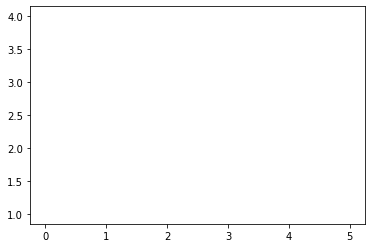

In [5]:
plt.plot(5,4,1) 
x = dict(lda.show_topic(t,200))
im = wc.generate_from_frequencies(x)
plt.imshow(im)
plt.axis("off")
plt.title("Topic #" + str(t))

- tomotopy

In [70]:
pip install tomotopy 

     |████████████████████████████████| 16.2MB 241kB/s 


In [72]:
import tomotopy as tp # 먼저 모듈을 불러와야겠죠
 
model = tp.LDAModel(k=20, alpha=0.1, eta=0.01, min_cf=5)
# LDAModel을 생성합니다.
# 토픽의 개수(k)는 20개, alpha 파라미터는 0.1, eta 파라미터는 0.01
# 전체 말뭉치에 5회 미만 등장한 단어들은 제거할 겁니다.
 
# 다음 구문은 input_file.txt 파일에서 한 줄씩 읽어와서 model에 추가합니다.
for i, line in enumerate(df['Message_by_khaiii_content']):
    model.add_doc(line.strip().split()) # 공백 기준으로 단어를 나누어 model에 추가합니다.
    if i % 10 == 0: print('Document #{} has been loaded'.format(i))
 
# model의 num_words나 num_vocabs 등은 train을 시작해야 확정됩니다.
# 따라서 이 값을 확인하기 위해서 train(0)을 하여 실제 train은 하지 않고
# 학습 준비만 시킵니다.
# num_words, num_vocabs에 관심 없다면 이부분은 생략해도 됩니다.
model.train(0) 
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 
# 다음 구문은 train을 총 200회 반복하면서, 
# 매 단계별로 로그 가능도 값을 출력해줍니다.
# 혹은 단순히 model.train(200)으로 200회 반복도 가능합니다.
for i in range(200):
    print('Iteration {}\tLL per word: {}'.format(i, model.ll_per_word))
    model.train(1)
 
# 학습된 토픽들을 출력해보도록 합시다.
for i in range(model.k):
    # 토픽 개수가 총 20개이니, 0~19번까지의 토픽별 상위 단어 10개를 뽑아봅시다.
    res = model.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))


Document #0 has been loaded


RuntimeError: ignored